Kelompok
1. Faisal Ridwan (1301174010)
2. Ilham Rizki Julianto (1301170293)

Tugas K-Means IF-41-06

In [7]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Mengimpor dataset
data = pd.read_csv('DataSet.csv')
print("Input Data and Shape")
print(data.shape)
data

Input Data and Shape
(30, 3)


,No,x,y
0,1,18,40
1,2,28,23
2,3,57,3
3,4,75,50
4,5,39,84
5,6,89,86
6,7,16,70
7,8,56,30
8,9,43,46
9,10,65,1


<function matplotlib.pyplot.show(*args, **kw)>

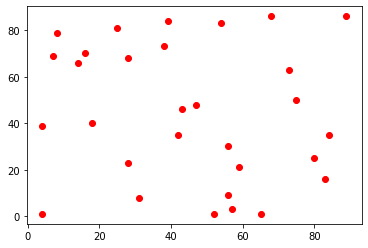

In [9]:
# Dapatkan nilai dan  plotting
f1 = data['x'].values
f2 = data['y'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, color='red')
plt.show


In [10]:
# Kalkulator Jarak Euclidean
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

# Jumlah Cluster
k = 3
# Koordinat X ramndom centroid
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Koordinat Y ramndom centroid
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C_x)
print(C_y)

Initial Centroids
[20  3 61]
[20 43  9]


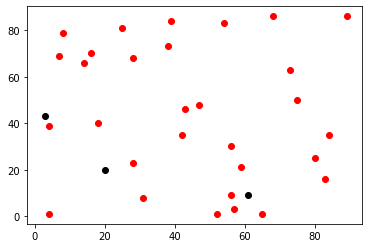

In [11]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='red')
plt.scatter(C_x, C_y, c='black')

[18 28 43 47  4  4 52 31 42]
[40 23 46 48 39  1  1  8 35]
29.88889 26.777779
==
[39 16 28 54 68  8 14 38  7 25]
[84 70 68 83 86 79 66 73 69 81]
29.7 75.9
==
[57 75 89 56 65 83 56 59 84 73 80]
[ 3 50 86 30  1 16  9 21 35 63 25]
70.63636 30.818182
==


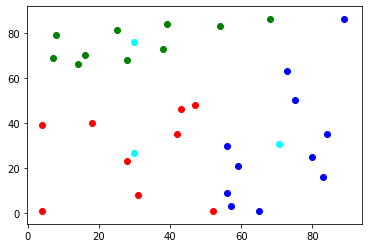

In [12]:
# Untuk menyimpan nilai centroid saat diperbarui
C_old = np.zeros(C.shape)
# Label Cluster(0, 1, 2)
clusters = np.zeros(len(X))
# fungsi Error. - Jarak antara centroid baru dan centroid lama
error = dist(C, C_old, None)
# Loop akan berjalan sampai error menjadi nol
while error != 0:
    # Menetapkan setiap nilai ke kluster terdekat
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Menyimpan nilai centroid lama
    C_old = deepcopy(C)
    # Menemukan centroid baru dengan mengambil nilai rata-rata
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['r', 'g', 'b']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] 
            for j in range(len(X)) 
                if clusters[j] == i])
        
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
        print(points[:, 0])
        print(points[:, 1])
        print(C[i, 0], C[i, 1])
        print("==")
        
ax.scatter(C[:, 0], C[:, 1], c='cyan')

